In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('plane_accidents.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [4]:
df.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

In [8]:
df

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [7]:
dataf = df[['incidents_85_99', 'incidents_00_14']].reset_index(drop=True)
dataf.head(1)

,incidents_85_99,incidents_00_14
0,2,0


In [9]:
from scipy.stats import expon, norm, poisson, uniform

In [10]:
import numpy as np

In [11]:
import seaborn as sns

<AxesSubplot:>

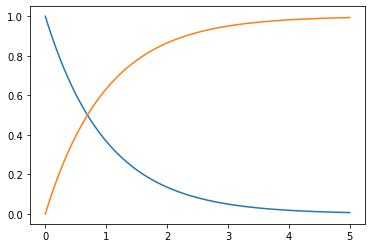

In [91]:
xx = np.linspace(0, 5, 100)
yy = expon.pdf(xx)
sns.lineplot(x=xx, y=yy)
yy = expon.cdf(xx)
sns.lineplot(x=xx, y=yy)

<AxesSubplot:xlabel='incidents_85_99', ylabel='Count'>

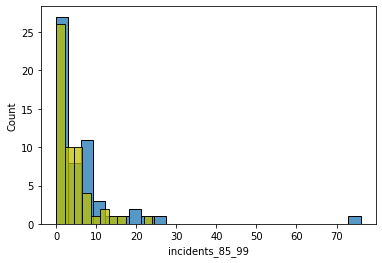

In [18]:
sns.histplot(dataf, x='incidents_85_99')
sns.histplot(dataf, x='incidents_00_14', color='y')

Removing last point as an outlier 

In [78]:
data1 = dataf.incidents_85_99.sort_values().reset_index(drop=True)[:-1]
data2 = dataf.incidents_00_14.sort_values().reset_index(drop=True)[:-1]

In [79]:
n1 = data1.shape[0]
n2 = data2.shape[0]
n1, n2

(55, 55)

In [80]:
cpf1 = (np.array(data1.index+1) + 0.5)/n1
cpf2 = (np.array(data2.index+1) + 0.5)/n2

In [81]:
from scipy import interpolate

In [92]:
ppf2 = interpolate.interp1d(cpf2, data2)
ppf1 = interpolate.interp1d(cpf1, data1)

In [97]:
set(cpf2)

{0.02727272727272727,
 0.045454545454545456,
 0.06363636363636363,
 0.08181818181818182,
 0.1,
 0.11818181818181818,
 0.13636363636363635,
 0.15454545454545454,
 0.17272727272727273,
 0.19090909090909092,
 0.20909090909090908,
 0.22727272727272727,
 0.24545454545454545,
 0.2636363636363636,
 0.2818181818181818,
 0.3,
 0.3181818181818182,
 0.33636363636363636,
 0.35454545454545455,
 0.37272727272727274,
 0.39090909090909093,
 0.4090909090909091,
 0.42727272727272725,
 0.44545454545454544,
 0.4636363636363636,
 0.4818181818181818,
 0.5,
 0.5181818181818182,
 0.5363636363636364,
 0.5545454545454546,
 0.5727272727272728,
 0.5909090909090909,
 0.6090909090909091,
 0.6272727272727273,
 0.6454545454545455,
 0.6636363636363637,
 0.6818181818181818,
 0.7,
 0.7181818181818181,
 0.7363636363636363,
 0.7545454545454545,
 0.7727272727272727,
 0.7909090909090909,
 0.8090909090909091,
 0.8272727272727273,
 0.8454545454545455,
 0.8636363636363636,
 0.8818181818181818,
 0.9,
 0.9181818181818182,
 0.936

In [107]:
cpf12 = np.array(list(set(cpf1) | set(cpf2)))

In [109]:
cpf12.sort()

In [83]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'CPF')

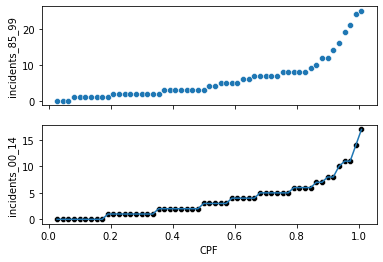

In [86]:
fig, axs = plt.subplots(2, 1, sharex=True)
sns.scatterplot(x=cpf1, y=data1, ax=axs[0])
xx = np.linspace(min(cpf2), max(cpf2), 1000)
axs[1].set_ylabel(data2.name)
sns.scatterplot(x=cpf2, y=data2, ax=axs[1], color='k')
sns.lineplot(x=xx, y=ppf2(xx), ax=axs[1])
plt.xlabel('CPF')

<AxesSubplot:title={'center':'QQ-plot'}, xlabel='incidents_00_14', ylabel='incidents_85_99'>

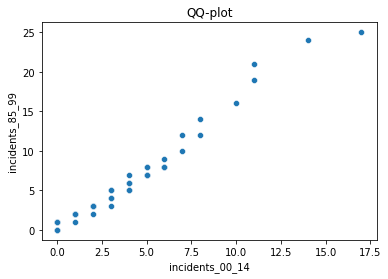

In [111]:
plt.title('QQ-plot')
Qy = pd.Series(ppf1(cpf12))
Qy.name = data1.name
Qx = pd.Series(ppf2(cpf12))
Qx.name = data2.name
sns.scatterplot(x=Qx, y=Qy)

<AxesSubplot:title={'center':'QQ-plot'}, xlabel='expon', ylabel='incidents_85_99'>

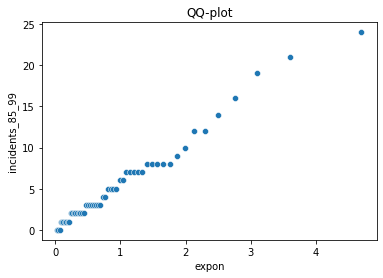

In [68]:
plt.title('QQ-plot')
Qy = data1
Qx = pd.Series(expon.ppf(cpf1))
Qx.name = expon.name
sns.scatterplot(x=Qx, y=Qy)

<AxesSubplot:title={'center':'QQ-plot'}, xlabel='expon', ylabel='incidents_00_14'>

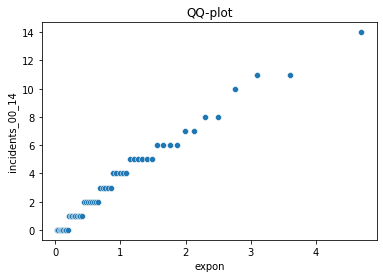

In [67]:
plt.title('QQ-plot')
Qy = data2
Qx = pd.Series(expon.ppf(cpf2))
Qx.name = expon.name
sns.scatterplot(x=Qx, y=Qy)